In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

importing the dataset

In [56]:
dataframe=pd.read_csv("/content/drive/MyDrive/ML Data/data_banknote_authentication.txt")
dataframe.to_csv("/content/drive/MyDrive/ML Data/data_banknote_authentication.csv",index=None)
dataframe.columns=['Variance','Skewness','Curtosis','Entropy','Class']

Analyzing the dataframe

In [57]:
print(dataframe)

      Variance  Skewness  Curtosis  Entropy  Class
0      4.54590   8.16740   -2.4586 -1.46210      0
1      3.86600  -2.63830    1.9242  0.10645      0
2      3.45660   9.52280   -4.0112 -3.59440      0
3      0.32924  -4.45520    4.5718 -0.98880      0
4      4.36840   9.67180   -3.9606 -3.16250      0
...        ...       ...       ...      ...    ...
1366   0.40614   1.34920   -1.4501 -0.55949      1
1367  -1.38870  -4.87730    6.4774  0.34179      1
1368  -3.75030 -13.45860   17.5932 -2.77710      1
1369  -3.56370  -8.38270   12.3930 -1.28230      1
1370  -2.54190  -0.65804    2.6842  1.19520      1

[1371 rows x 5 columns]


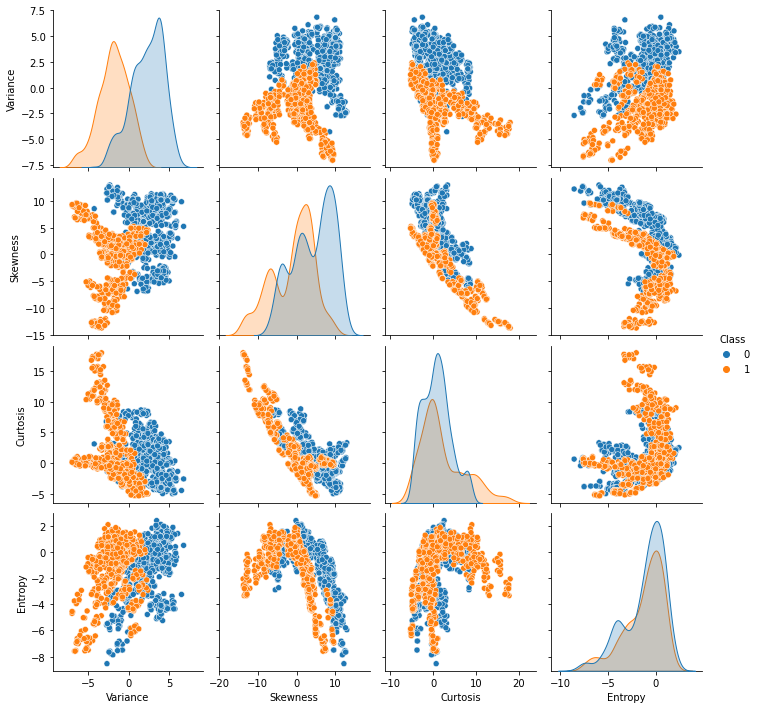

In [70]:
sns.color_palette("tab10")
sns.pairplot(dataframe, hue="Class")

In [71]:
dataframe.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.431410,1.917434,1.400694,-1.192200,0.444931
std,2.842494,5.868359,4.310105,2.101683,0.497139
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.774700,-1.711300,-1.553350,-2.417000,0.000000
50%,0.495710,2.313400,0.616630,-0.586650,0.000000
75%,2.814650,6.813100,3.181600,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [58]:
attributes=dataframe.iloc[:,:-1].values
labels=dataframe.iloc[:,-1].values

In [59]:
labels.shape

(1371,)

In [60]:
print(attributes)
print(labels)

[[  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 [  3.4566    9.5228   -4.0112   -3.5944 ]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]
[0 0 0 ... 1 1 1]


In [61]:
Ylabel0=[]
Ylabel1=[]
for index, label in enumerate(labels):
  if label==0:
    Ylabel0.append(index)
  if label==1:
    Ylabel1.append(index)

In [62]:
x1=np.delete(attributes,Ylabel0,axis=0)
y1=np.delete(labels,Ylabel0,axis=0)

x0=np.delete(attributes,Ylabel1,axis=0)
y0=np.delete(labels,Ylabel1,axis=0)

Train Test split of data

In [63]:
from sklearn.model_selection import train_test_split

x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.5,random_state=6)
x0_train,x0_test,y0_train,y0_test=train_test_split(x0,y0,test_size=0.5,random_state=6)

x_train=np.concatenate((x1_train,x0_train),axis=0)
y_train=np.concatenate((y1_train,y0_train),axis=0)
x_test=np.concatenate((x1_test,x0_test),axis=0)
y_test=np.concatenate((y1_test,y0_test),axis=0)

Prediction

In [64]:
from sklearn.naive_bayes import GaussianNB
Classifier=GaussianNB()
Classifier.fit(x_train,y_train)
predicted=Classifier.predict(x_test)

Analysis of predicted results

Confusion Matrix:
[[329  52]
 [ 72 233]]


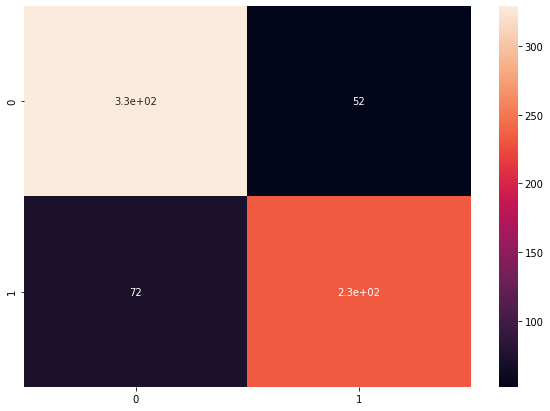

In [76]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("Confusion Matrix:")
print(confusion_matrix(y_test, predicted))


import pandas as pd

array = confusion_matrix(y_test, predicted)
df_cm = pd.DataFrame(array, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [77]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       381
           1       0.82      0.76      0.79       305

    accuracy                           0.82       686
   macro avg       0.82      0.81      0.82       686
weighted avg       0.82      0.82      0.82       686



In [72]:
from sklearn.metrics import roc_curve,auc
import plotly.express as px

fpr, tpr, thresholds = roc_curve(predicted, y_test)

from sklearn.metrics import confusion_matrix

figCurve = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.3f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    color=["blue","red","green"]
)
figCurve.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

figCurve.update_yaxes(scaleanchor="x", scaleratio=1)
figCurve.update_xaxes(constrain='domain')

figCurve

In [67]:
Classifier.class_prior_=[0.1,0.9]
y1_pred=Classifier.predict(x_test)

Confusion Matrix:
[[250 131]
 [  6 299]]


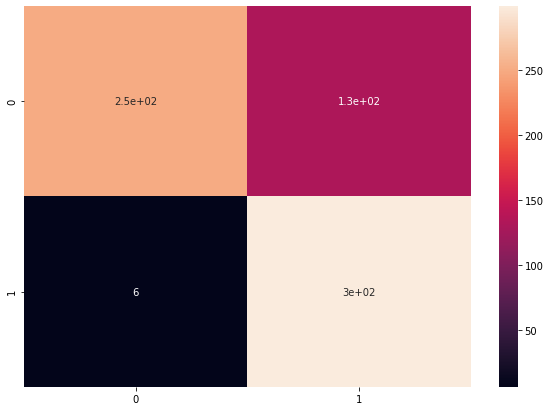

In [75]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y1_pred))

import pandas as pd

array = confusion_matrix(y_test, y1_pred)
df_cm = pd.DataFrame(array, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [73]:
fpr1, tpr1, thresholds1 = roc_curve(y1_pred, y_test)
figCurve1 = px.area(
    x=fpr1, y=tpr1,
    title=f'ROC Curve (AUC={auc(fpr1, tpr1):.3f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    color=["blue","red","green"]
)
figCurve1.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

figCurve1.update_yaxes(scaleanchor="x", scaleratio=1)
figCurve1.update_xaxes(constrain='domain')

figCurve1